Implementation of this https://polipapers.upv.es/index.php/MSEL/article/view/4524/4724

In [20]:
!wget "https://www.fcbarcelona.com/photo-resources/2021/02/25/800a4af4-a92a-4116-b9be-0f3c44ad5c84/mini_2021-02-25-OTRO-BARCELONA-ELCHE-14.JPG?width=200&height=200"

--2021-06-10 23:59:04--  https://www.fcbarcelona.com/photo-resources/2021/02/25/800a4af4-a92a-4116-b9be-0f3c44ad5c84/mini_2021-02-25-OTRO-BARCELONA-ELCHE-14.JPG?width=200&height=200
Resolving www.fcbarcelona.com (www.fcbarcelona.com)... 13.224.111.16, 13.224.111.111, 13.224.111.117, ...
Connecting to www.fcbarcelona.com (www.fcbarcelona.com)|13.224.111.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8646 (8,4K) [image/jpeg]
Saving to: ‘mini_2021-02-25-OTRO-BARCELONA-ELCHE-14.JPG?width=200&height=200.3’

mini_2021-02-25-OTR 100%[===================>]   8,44K  --.-KB/s    in 0,001s  

2021-06-10 23:59:04 (11,5 MB/s) - ‘mini_2021-02-25-OTRO-BARCELONA-ELCHE-14.JPG?width=200&height=200.3’ saved [8646/8646]



In [ ]:
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt

def loadImage():
  img = cv2.imread("mini_2021-02-25-OTRO-BARCELONA-ELCHE-14.JPG?width=200&height=200")
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


img=loadImage()
plt.imshow(img)
plt.show()

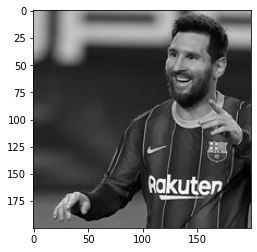

In [18]:
img = loadImage()

# Just testing cv2 lib here
for y in range(len(img)):
  for x in range(len(img[0])):
    r, g, b = img[x, y]
    sum = int(r)+int(g)+int(b)
    avg = sum / 3
    img[x, y] = [avg, avg, avg]

plt.imshow(img)
plt.show()

In [14]:
def conv(img, kernel, c=1, inc=0):
  h = len(img[0])
  w = len(img)

  kw = len(kernel)
  khalf = math.trunc(kw/2)

  result = img.copy()

  for y in range(h):
    for x in range(w):
      val = [0, 0, 0]
      for kx in range(-khalf, khalf+1):
        for ky in range(-khalf, khalf+1):
          imgx = x+kx
          imgy = y+ky
          if imgx < 0 or imgx >= w or imgy < 0 or imgy >= h:
            continue
          r, g, b = img[imgx, imgy]
          val[0] += int(r) * kernel[ky][kx] * (1/c) + inc
          val[1] += int(g) * kernel[ky][kx] * (1/c) + inc
          val[2] += int(b) * kernel[ky][kx] * (1/c) + inc

      result[x, y] = val
  return result

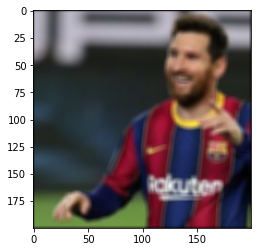

In [19]:
kernel = [
  [1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1]
]

img = loadImage()

result = conv(img, kernel, 25, 0)

plt.imshow(result)
plt.show()